In [32]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
# import dataset
df = pd.read_csv('../Without Feature Selection/UFC_clustering.csv')
df.head()

,R_fighter,B_fighter,location,weight_class,B_Stance,R_Stance,Winner,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,gender
0,Jorge Masvidal,Al Iaquinta,"Fairfax, Virginia, USA",5,Orthodox,Orthodox,Blue,0.768371,0.000000,0.332278,...,1.609438,0.000000,0.693147,0.000000,5.817944,5.832938,5.655992,3.871201,3.912023,1
1,Josh Koscheck,Johny Hendricks,"East Rutherford, New Jersey, USA",6,Southpaw,Orthodox,Blue,0.527867,0.000000,0.578499,...,1.791759,1.945910,1.386294,0.000000,5.810362,5.825469,5.655992,3.891820,3.988984,1
2,John Dodson,Manvel Gamburyan,"Tampa, Florida, USA",3,Orthodox,Orthodox,Red,0.405465,0.236337,0.323143,...,1.098612,1.386294,0.000000,0.693147,5.755616,5.771566,5.525453,4.007333,3.931826,1
3,Tony Ferguson,Katsunori Kikuno,"Las Vegas, Nevada, USA",5,Orthodox,Orthodox,Red,0.000000,0.000000,0.385262,...,0.693147,0.693147,0.693147,0.693147,5.817944,5.847710,5.602119,3.970292,3.912023,1
4,Richard Walsh,Viscardi Andrade,"Brisbane, Queensland, Australia",6,Orthodox,Orthodox,Blue,0.405465,0.000000,0.378436,...,1.098612,0.000000,0.000000,0.000000,5.825469,5.825469,5.655992,3.970292,3.850148,1


In [34]:
features_to_keep = ["B_fighter", "R_fighter", "B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed", "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed"]

df_cluster5 = df[features_to_keep]

df_cluster5.head()

,B_fighter,R_fighter,B_avg_HEAD_landed,B_avg_BODY_landed,B_avg_LEG_landed,B_avg_DISTANCE_landed,R_avg_HEAD_landed,R_avg_BODY_landed,R_avg_LEG_landed,R_avg_DISTANCE_landed
0,Al Iaquinta,Jorge Masvidal,3.713000,2.170838,1.870600,3.867287,3.657937,2.916080,1.842532,3.750974
1,Johny Hendricks,Josh Koscheck,2.549811,1.713235,1.298573,2.290006,3.029900,2.114959,0.144418,2.766444
2,Manvel Gamburyan,John Dodson,2.978172,1.864489,1.928921,3.068110,2.822123,3.000798,2.392197,3.537557
3,Katsunori Kikuno,Tony Ferguson,2.833213,1.791759,1.098612,2.890372,2.744864,1.490091,2.031432,3.164947
4,Viscardi Andrade,Richard Walsh,3.277145,2.772589,2.140066,3.496508,3.710519,2.474435,2.740840,3.544576


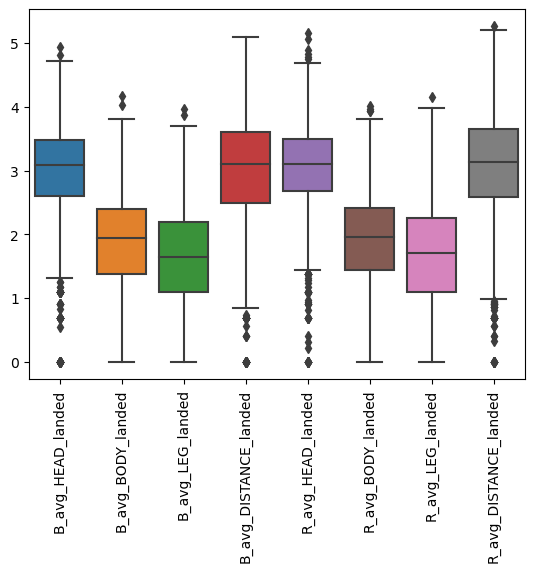

In [35]:
# Check outliers
sns.boxplot(data=df_cluster5)
plt.xticks(rotation=90)
plt.show()


In [36]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [37]:
outliers = dict(check_outlier(df_cluster5[1:]).sum())
print("\n\npercentage of outliers in each column:")
for key in outliers.keys():
    print(f"{key} = {outliers[key]/df_cluster5[1:][key].shape[0] * 100}%")

Outlier pada tiap atribut:
B_avg_BODY_landed         2
B_avg_DISTANCE_landed    45
B_avg_HEAD_landed        73
B_avg_LEG_landed          2
B_fighter                 0
R_avg_BODY_landed         4
R_avg_DISTANCE_landed    40
R_avg_HEAD_landed        54
R_avg_LEG_landed          1
R_fighter                 0
dtype: int64


percentage of outliers in each column:
B_avg_BODY_landed = 0.0655307994757536%
B_avg_DISTANCE_landed = 1.474442988204456%
B_avg_HEAD_landed = 2.3918741808650066%
B_avg_LEG_landed = 0.0655307994757536%
B_fighter = 0.0%
R_avg_BODY_landed = 0.1310615989515072%
R_avg_DISTANCE_landed = 1.310615989515072%
R_avg_HEAD_landed = 1.7693315858453473%
R_avg_LEG_landed = 0.0327653997378768%
R_fighter = 0.0%


/var/folders/53/kv053qr13vxg2_y_1lg6hjg80000gn/T/ipykernel_44492/3859787923.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


In [38]:
# Drop outliers in x y z columns
def drop_outliers(df, column_name):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    df_filtered = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

    return df_filtered

In [39]:
columns_to_drop_outliers = ["B_avg_HEAD_landed", "B_avg_BODY_landed", "B_avg_LEG_landed", "B_avg_DISTANCE_landed", "R_avg_HEAD_landed", "R_avg_BODY_landed", "R_avg_LEG_landed", "R_avg_DISTANCE_landed"]

for c in columns_to_drop_outliers:
    df_cluster5 = drop_outliers(df_cluster5, c)

df_cluster5.shape

(2834, 10)

In [40]:
# Drop B_Fighter and R_Fighter
df_cluster5 = df_cluster5.drop(["B_fighter", "R_fighter"], axis=1)

df_cluster5.head()

,B_avg_HEAD_landed,B_avg_BODY_landed,B_avg_LEG_landed,B_avg_DISTANCE_landed,R_avg_HEAD_landed,R_avg_BODY_landed,R_avg_LEG_landed,R_avg_DISTANCE_landed
0,3.713000,2.170838,1.870600,3.867287,3.657937,2.916080,1.842532,3.750974
1,2.549811,1.713235,1.298573,2.290006,3.029900,2.114959,0.144418,2.766444
2,2.978172,1.864489,1.928921,3.068110,2.822123,3.000798,2.392197,3.537557
3,2.833213,1.791759,1.098612,2.890372,2.744864,1.490091,2.031432,3.164947
4,3.277145,2.772589,2.140066,3.496508,3.710519,2.474435,2.740840,3.544576


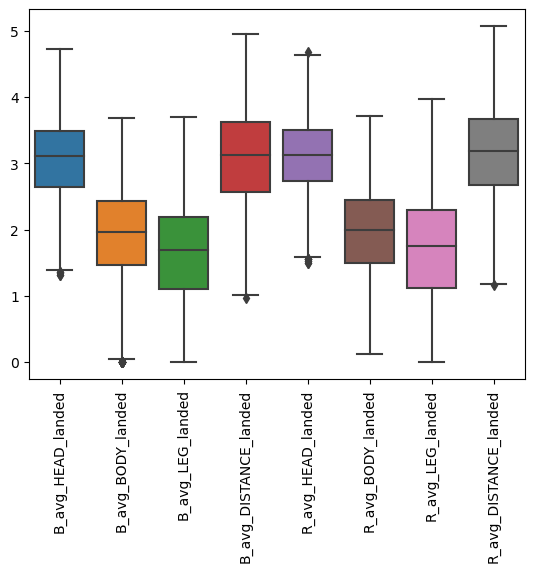

In [41]:
# Boxplot
sns.boxplot(data=df_cluster5)
plt.xticks(rotation=90)
plt.show()


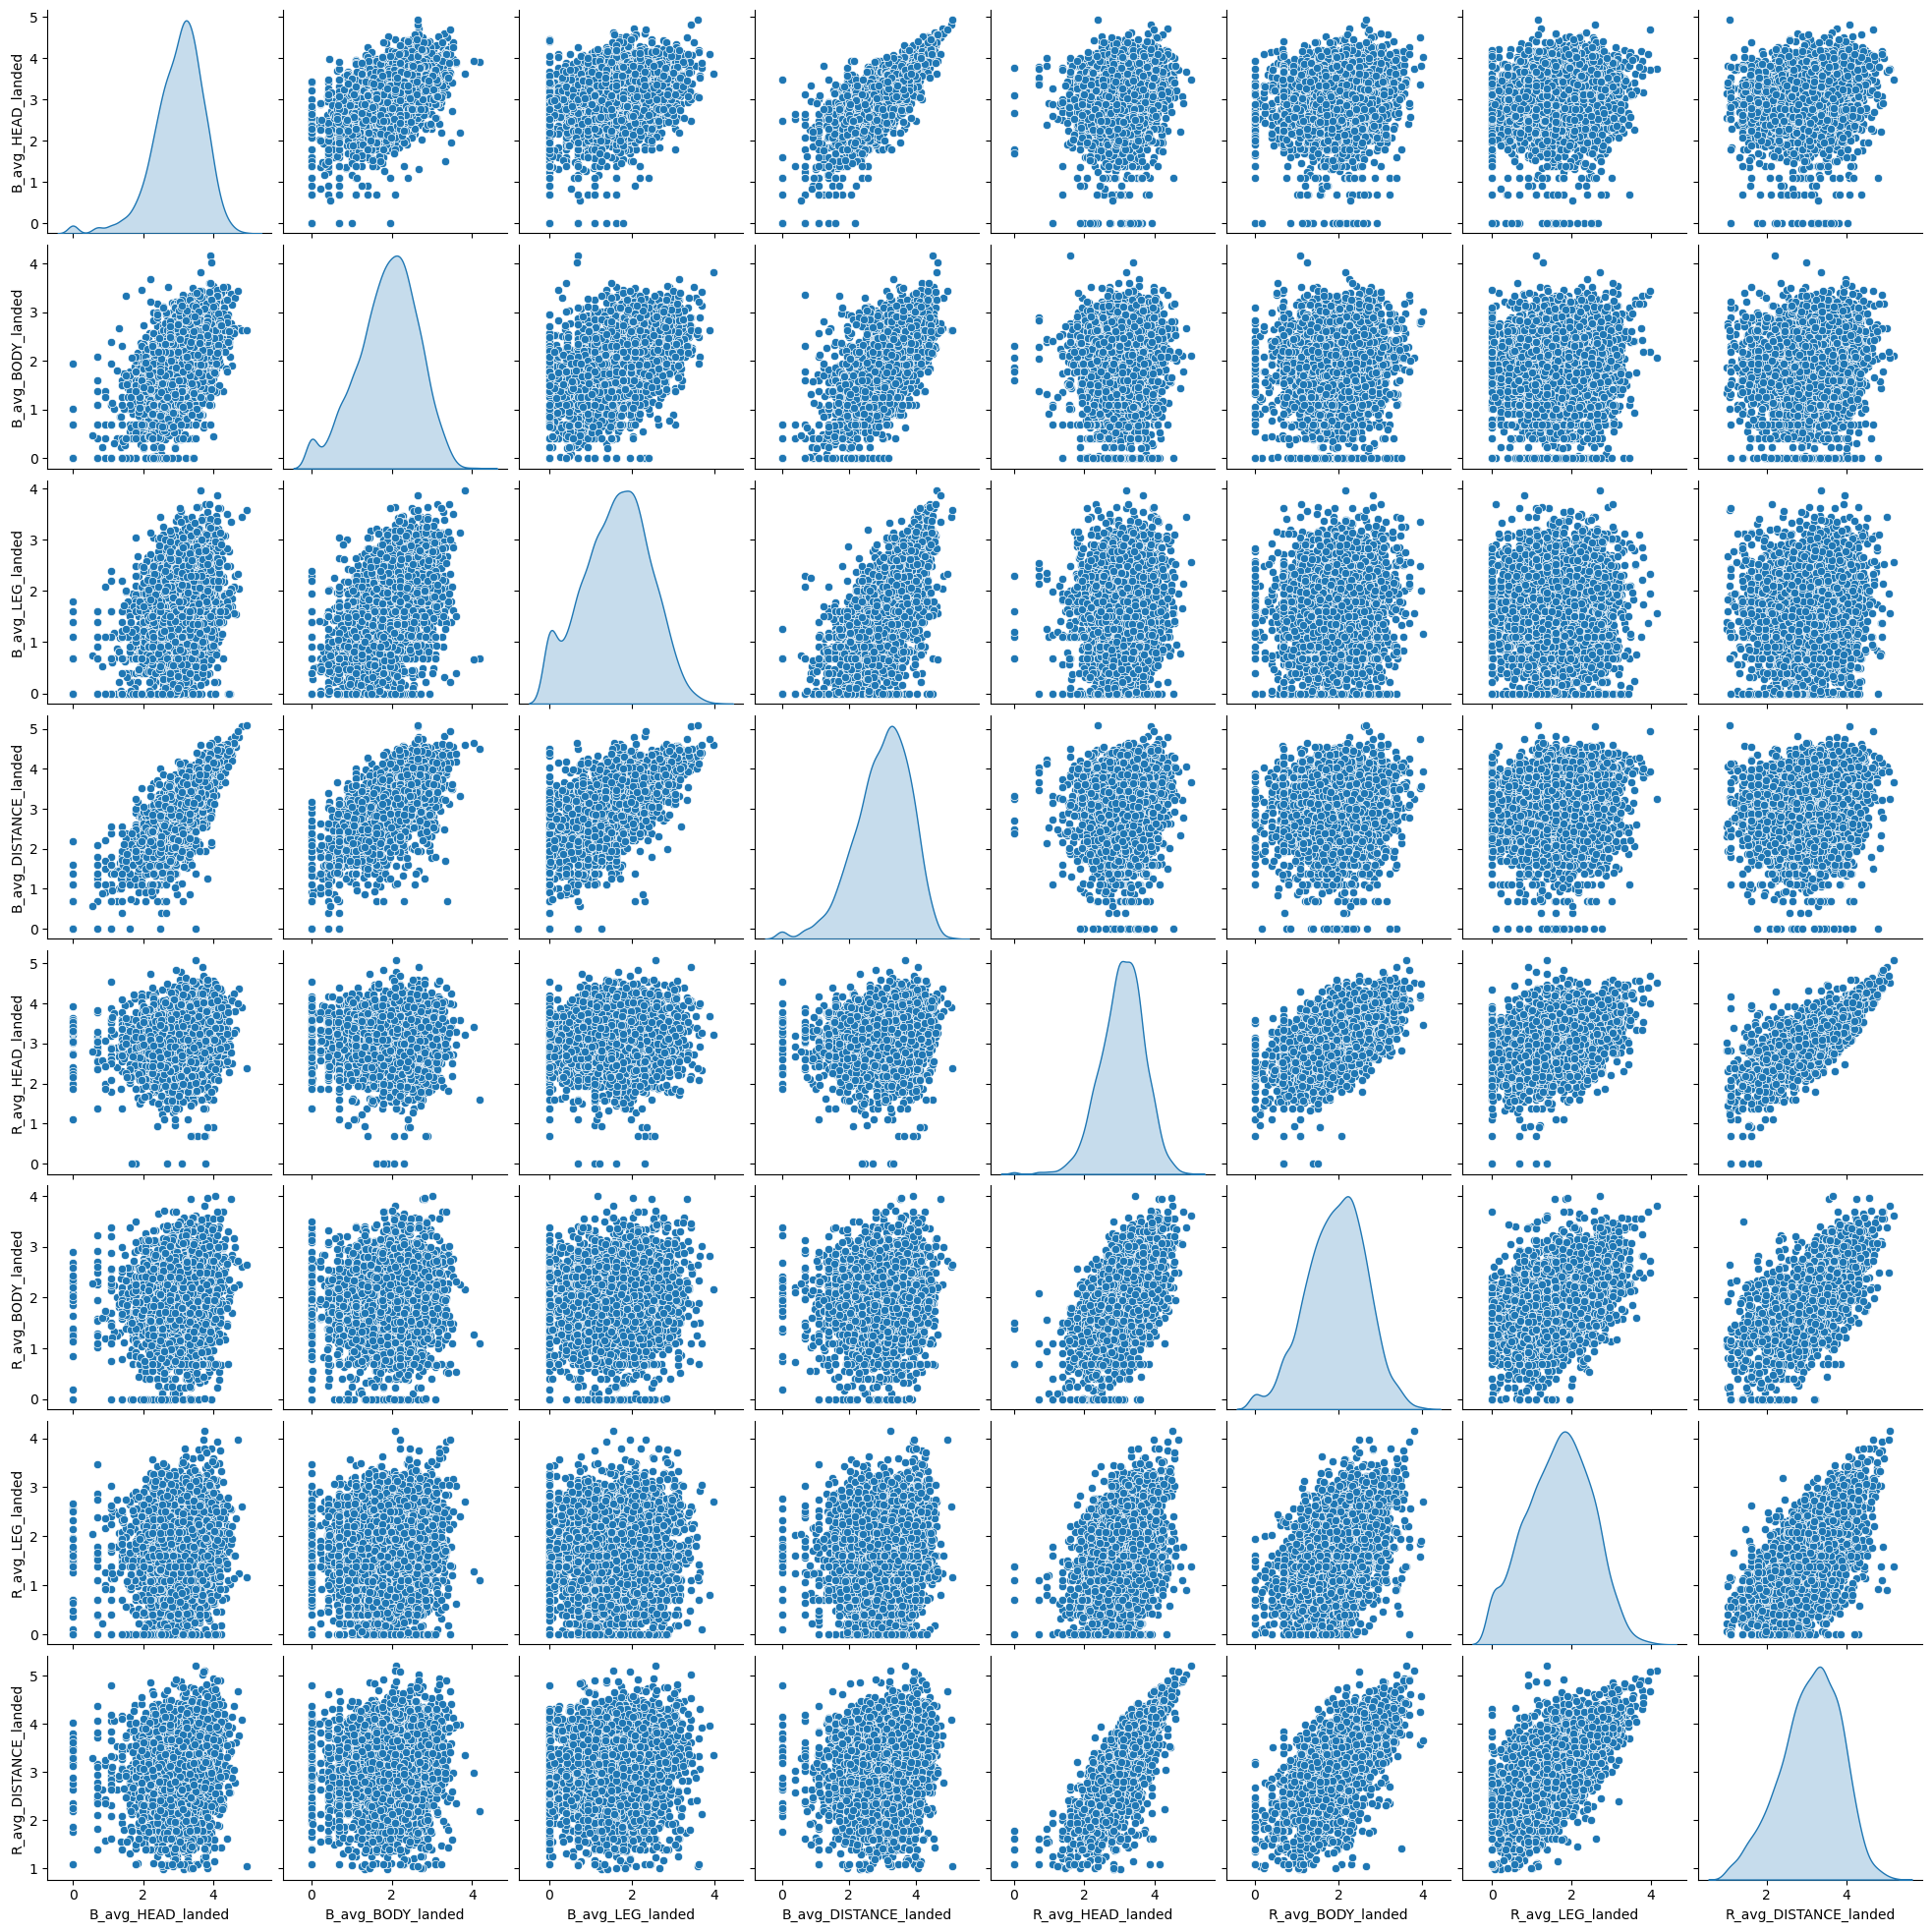

In [42]:
#Pairplot
sns.pairplot(df_fighter, diag_kind='kde')
plt.show()

In [43]:
# Standardized the data
scaler = StandardScaler()
df_cluster5_scaled = scaler.fit_transform(df_cluster5)

df_cluster5_scaled = pd.DataFrame(df_cluster5_scaled, columns=df_cluster5.columns)

df_cluster5_scaled.head()

,B_avg_HEAD_landed,B_avg_BODY_landed,B_avg_LEG_landed,B_avg_DISTANCE_landed,R_avg_HEAD_landed,R_avg_BODY_landed,R_avg_LEG_landed,R_avg_DISTANCE_landed
0,1.068269,0.347732,0.289872,1.088279,0.953336,1.435044,0.166635,0.867305
1,-0.850211,-0.301049,-0.437069,-1.059519,-0.145580,0.217754,-1.980504,-0.522244
2,-0.143704,-0.086604,0.363988,0.000031,-0.509140,1.563771,0.861646,0.566092
3,-0.382788,-0.189718,-0.691181,-0.241996,-0.644324,-0.731723,0.405486,0.040197
4,0.349401,1.200883,0.632314,0.583385,1.045341,0.763972,1.302479,0.575999


In [46]:
from sklearn.decomposition import PCA

# PCA to two components
pca = PCA(n_components=3)
df_cluster5_pca = pca.fit_transform(df_cluster5_scaled)

# Create a new dataframe with the PCA scores
df_cluster5_pca = pd.DataFrame(df_cluster5_pca, columns=['PC1', 'PC2', 'PC3'])

df_cluster5_pca.head()

,PC1,PC2,PC3
0,-2.263040,-0.206478,-0.079259
1,1.747685,-0.117955,-1.320223
2,-0.879966,-0.844836,0.339991
3,0.858450,-0.188071,0.760694
4,-2.221836,-0.306935,0.141004


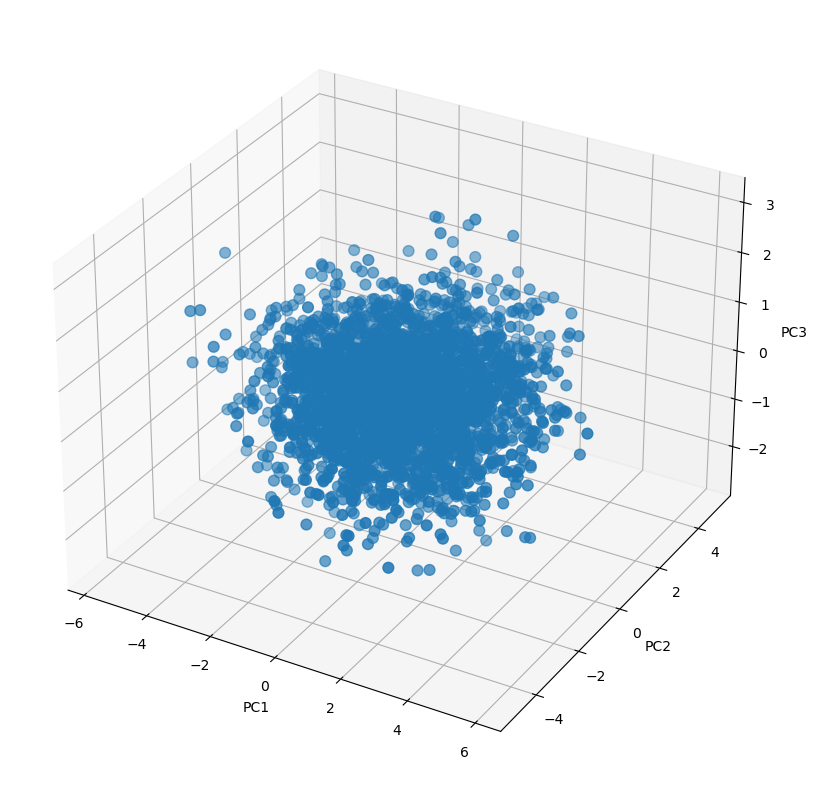

In [47]:
# Plot 3D PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cluster5_pca['PC1'], df_cluster5_pca['PC2'], df_cluster5_pca['PC3'], s=60)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()